In [1]:
  !pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
dfAverage = pd.read_excel('S -북구 정규화v3.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()


,병원 수,약국 수,경로당 수,체육시설 수,공원 수,버스정류장 수,지하철 역 수,음식점 수
0,-1.369294,-1.531392,-1.286252,-1.049546,-0.696911,-0.986602,-0.94388,-1.653832
1,-1.415224,-1.254530,-1.502884,-1.049546,-1.085884,-1.418241,0.13484,-0.771577
2,-1.047783,-1.254530,0.555119,-0.234365,0.340352,0.863277,2.29228,-0.466913
3,-0.588481,-0.700806,-1.069620,-0.886510,-0.437595,-0.986602,-0.94388,-0.822354
4,-0.266969,-0.700806,0.338487,-0.560437,0.599667,-0.246651,1.21356,0.199539


**KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

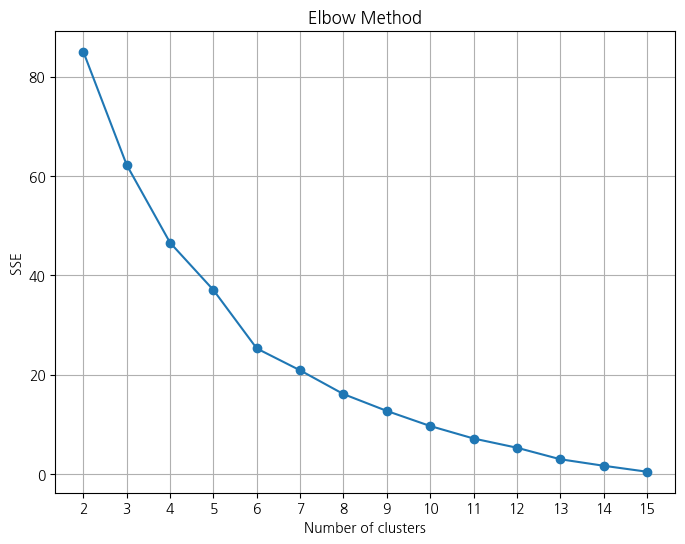

In [4]:
sse = []

K_range = range(2, len(dfAverage))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfAverage)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

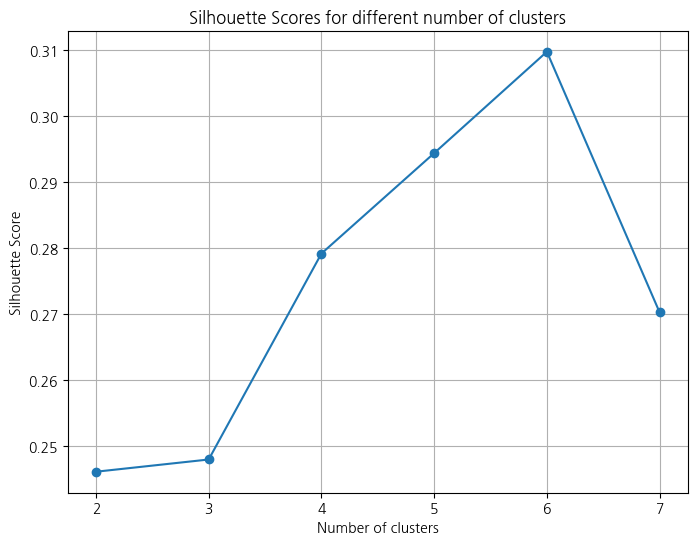

In [5]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# 클러스터 범위 설정
K_range = range(2, 8)  # 2에서 8 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dfAverage)
    score = silhouette_score(dfAverage, cluster_labels)
    silhouette_scores.append(score)

# Silhouette Score Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


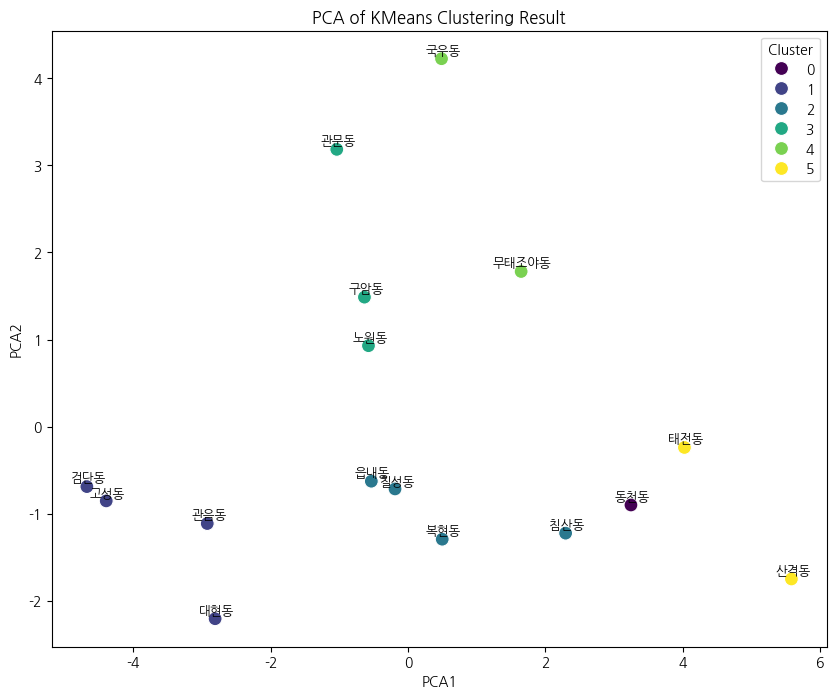

Cluster 0:
[8]
Cluster 1:
[0, 1, 3, 7]
Cluster 2:
[10, 12, 13, 14]
Cluster 3:
[2, 4, 6]


In [7]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dfAverage, palette='viridis', s=100)
행정구역 = ['검단동', '고성동', '관문동', '관음동', '구암동', '국우동', '노원동', '대현동','동천동','무태조야동','복현동','산격동','읍내동','칠성동','침산동','태전동']

for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i] + 0.02, txt, fontsize=9, ha='center', va='bottom')

plt.title('PCA of KMeans Clustering Result')
plt.legend(title='Cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [8]:
dfAverage.to_excel('S - 북구 KMeans클러스터링 결과.xlsx', index=False)

**DBSCAN**

In [9]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(dfAverage)
dfAverage['cluster'] = db.labels_
print(dfAverage)

        병원 수      약국 수     경로당 수    체육시설 수      공원 수   버스정류장 수  지하철 역 수  \
0  -1.369294 -1.531392 -1.286252 -1.049546 -0.696911 -0.986602 -0.94388   
1  -1.415224 -1.254530 -1.502884 -1.049546 -1.085884 -1.418241  0.13484   
2  -1.047783 -1.254530  0.555119 -0.234365  0.340352  0.863277  2.29228   
3  -0.588481 -0.700806 -1.069620 -0.886510 -0.437595 -0.986602 -0.94388   
4  -0.266969 -0.700806  0.338487 -0.560437  0.599667 -0.246651  1.21356   
5  -0.955922  0.129779 -0.203092 -0.071328  2.803849  1.603229  0.13484   
6   0.192333  0.406641 -1.069620 -1.049546  0.729325 -0.369976  1.21356   
7  -0.358830 -0.562375 -0.852988 -0.886510 -0.956226 -1.664891 -0.94388   
8   1.799890  1.790950 -0.528040  2.374216 -0.048622 -0.431638  1.21356   
9  -0.404760 -0.147083  0.446803  1.559035  1.507272  1.109928 -0.94388   
10  0.467914  0.406641  0.880067 -0.234365 -0.178279 -0.493301 -0.94388   
11  1.570239  1.929381  0.663435  0.743853 -0.567253  1.726554 -0.94388   
12 -0.221039  0.129779  0

**계층적 군집화**

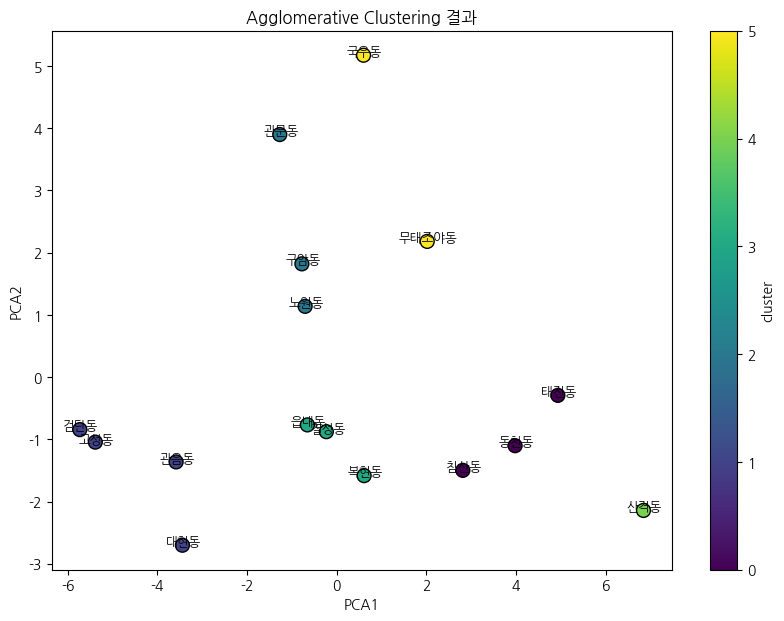

Cluster 0:
[8, 14, 15]
Cluster 1:
[0, 1, 3, 7]
Cluster 2:
[2, 4, 6]
Cluster 3:
[10, 12, 13]


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=6, linkage='complete')
clusters = agg.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = principal_components[:, 0]
dfAverage['PCA2'] = principal_components[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 7))
plt.scatter(dfAverage['PCA1'], dfAverage['PCA2'], c=dfAverage['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i], txt, fontsize=9, ha='center')

plt.title('Agglomerative Clustering 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [11]:
dfAverage.to_excel('S -북구 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [12]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00


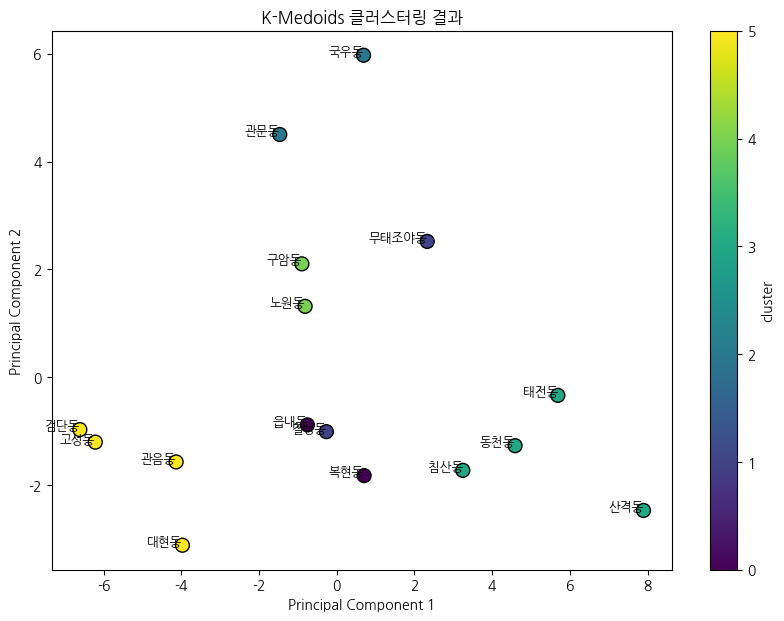

Cluster 0:
[10, 12]
Cluster 1:
[9, 13]
Cluster 2:
[2, 5]
Cluster 3:
[8, 11, 14, 15]


In [13]:
from sklearn_extra.cluster import KMedoids

# KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=6, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))

# 2D 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                 c=dfAverage['cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=9, ha='right')

plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc, label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())


In [14]:
dfAverage.to_excel('S -북구 K-Medoids클러스터링 결과.xlsx', index=False)